This notebook offers various functioanlity for manual (i.e, visual) analysis of the results

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from util import data
from util import visualisation as visu
from util import management as mana
from util import constants as con

###### ZELF INVULLEN
task = con.TASK_501
config = con.CONFIG_FULL
task_predict = con.TASK_501
trts = con.TRAIN
trainer = con.CLASSIC
modality = "0000"

Set the paths.

In [2]:
thesis_path = con.THESIS_PATH
data_path = f"{thesis_path}/Data/nnUNet_raw_data_base/nnUNet_raw_data/Task{task_predict}"
img_path = f'{data_path}/images{trts}'
label_path = f'{data_path}/labels{trts}'
segmentation_path = f"{thesis_path}/Results/{task}/{config}/{trainer}/inference/{task_predict}/images{trts}"

Define functions.

In [3]:
def dicom_animation(x):
    gt, img_slice, seg, dice = data.get_gt_img_slice_seg_dice(img, label, segmentation, x)
    print(f"DICE: {dice}")

    f = plt.figure(figsize=(30,30))

    # seg and label
    a1 = f.add_subplot(2, 2, 1)
    plt.imshow(gt, cmap=plt.cm.gray)
    plt.imshow(seg, cmap=plt.cm.jet_r, alpha=0.5)

    # seg over dicom
    a1 = f.add_subplot(2, 2, 2)
    plt.imshow(img_slice, cmap=plt.cm.gray)
    plt.imshow(seg, cmap=plt.cm.jet_r, alpha=0.1)
    plt.show()

    # # show label
    f = plt.figure(figsize=(30,30))
    a1 = f.add_subplot(2, 2, 1)
    plt.imshow(gt, cmap=plt.cm.gray)

    # show dicom
    a1 = f.add_subplot(2, 2, 2)
    plt.imshow(img_slice, cmap=plt.cm.gray)
    plt.imshow(gt, cmap=plt.cm.jet_r, alpha=0.1)
    plt.show()

    return x

def visualise_patient(rel_patient_id):
    # very ugly but necessary for the interactive widget 
    global img
    global label 
    global segmentation

    # get patient id so we can load data
    patient_id = mana.get_patient_id_from_rel_id(img_path, rel_patient_id)
    print(f"Loading data for patient {patient_id}")
    img, label, segmentation = data.get_all_data(patient_id, img_path, label_path, modality, segmentation_path)
    print(f"Mean dice {data.get_dice(label, segmentation)}")

    # slide through dicom images using a slide bar 
    plt.figure(1)
    data.interact(dicom_animation, x=(0, img.shape[2]-1))

Define the relative patient id and visualise the patient, with an interactive widcget

In [4]:
rel_patient_id = 0
visualise_patient(rel_patient_id)

Loading data for patient 0002
Mean dice 0.8778371313034125


<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=97, description='x', max=194), Output()), _dom_classes=('widget-interact…

Visualise the best and worst segmentations

Visualising worst and best for 0002

               0
count  71.000000
mean    0.844910
std     0.152306
min     0.000000
25%     0.844421
50%     0.870811
75%     0.901381
max     0.939022

Aggregated DICE info (for all slices)
Mean dice : 0.8778371313034125
Best : 0.9390220144165206, 1 times

Worst : 0.0, 2 times

DICE best case: 0.9390220144165206, with slice index 111


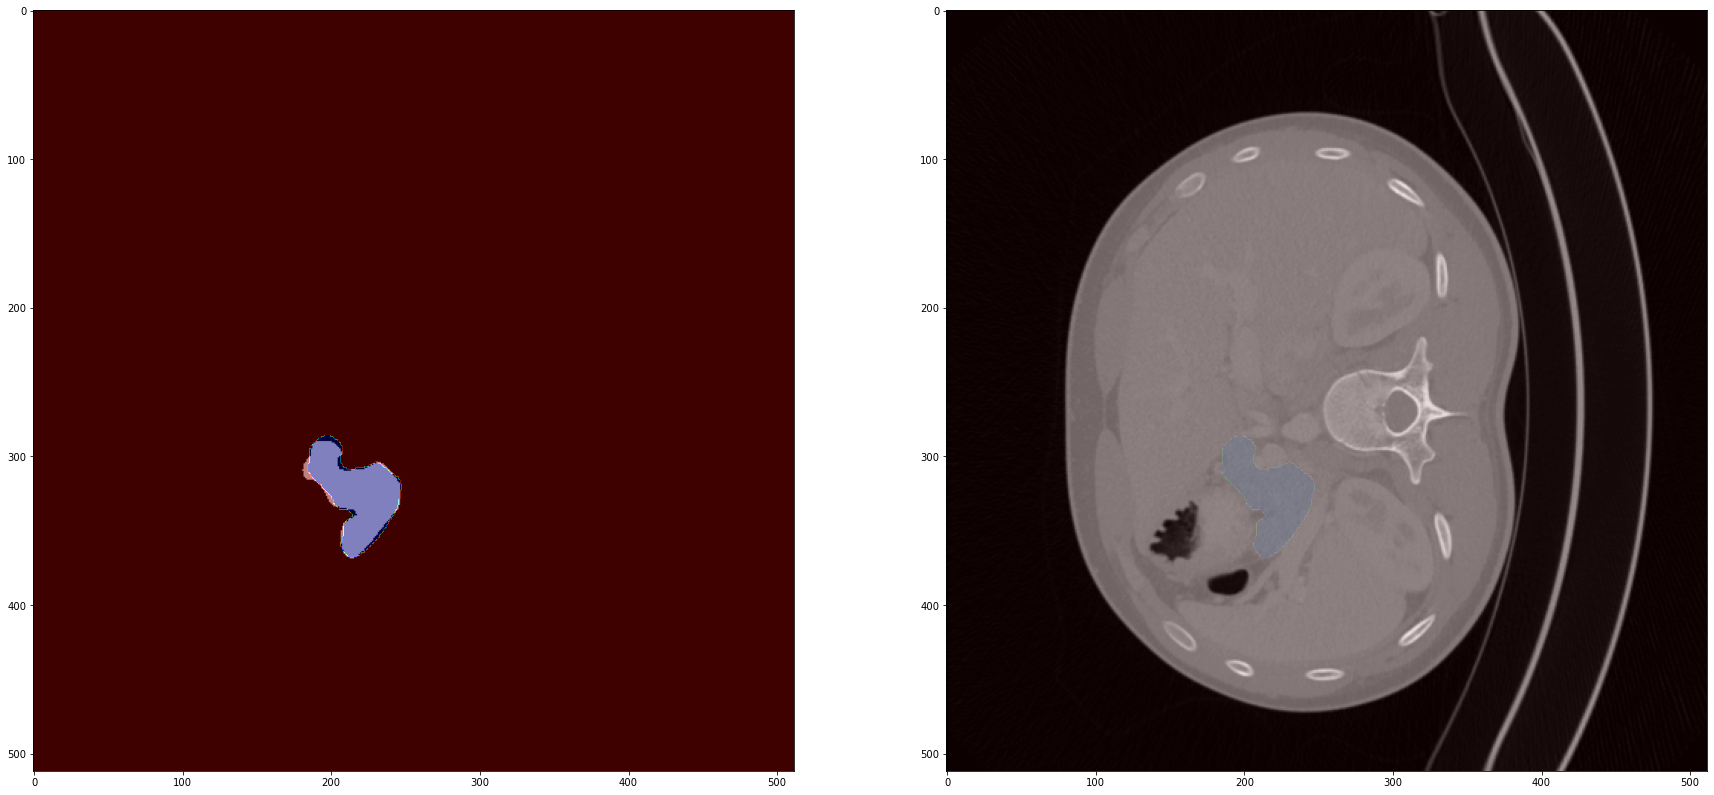


DICE worst case: 0.0, with slice index 61

DICE worst case: 0.0, with slice index 62


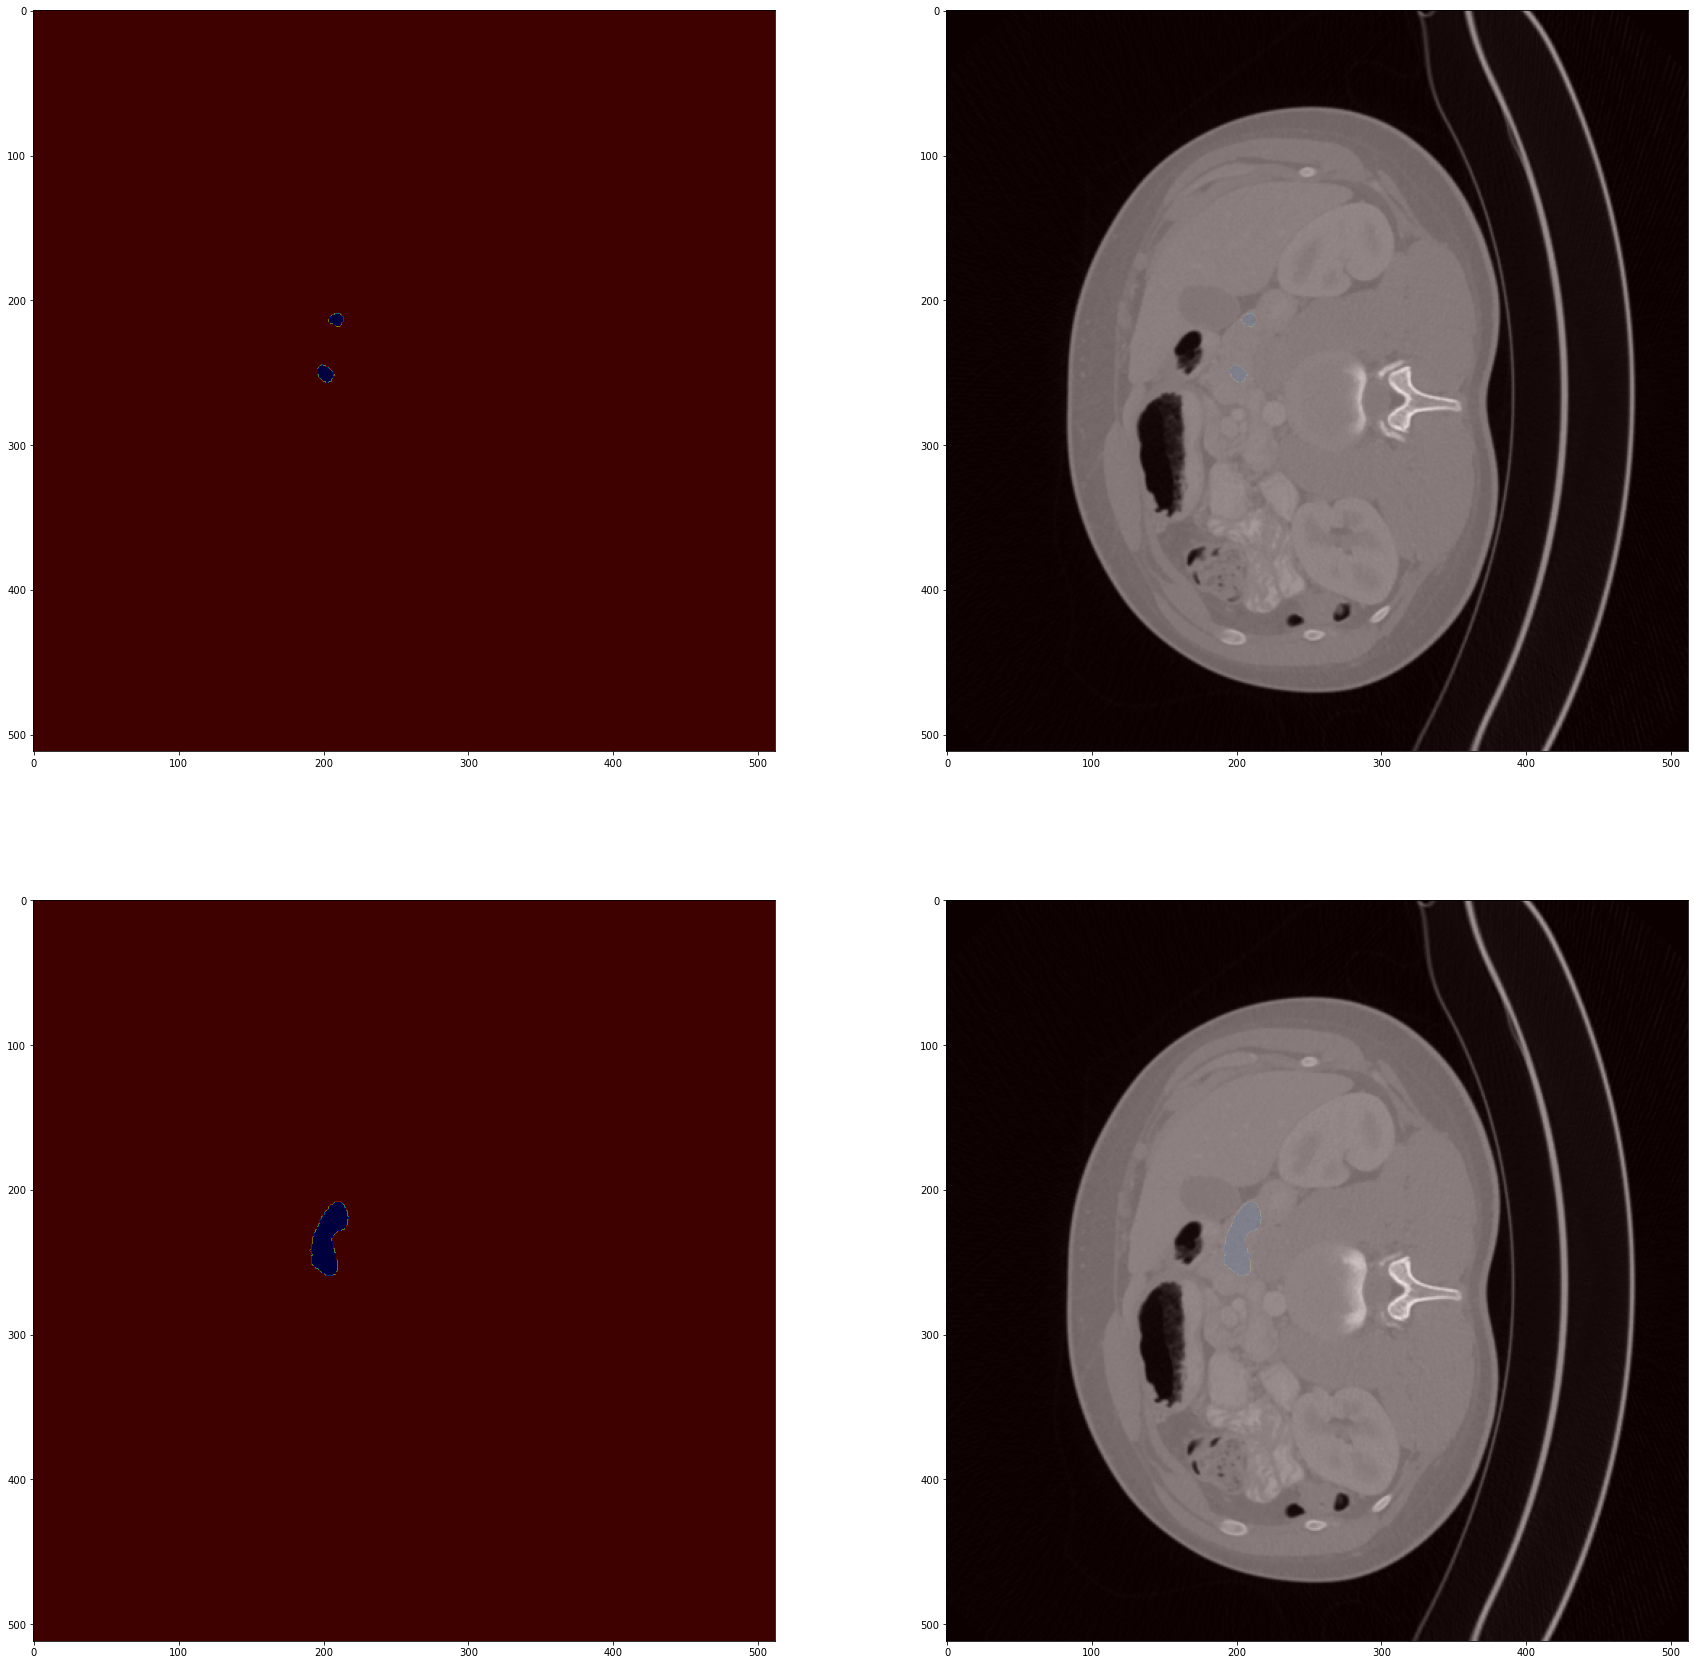

In [5]:
rel_patient_id=0
patient_id = mana.get_patient_id_from_rel_id(img_path, rel_patient_id)
visu.visualise_patient_worst_best(patient_id, img_path, label_path, segmentation_path, modality)